# Aviation Accident Database & Synopses, up to 2023

## Overview¶
This project analyzes data from the "Aviation Accident Database & Synopses" dataset to identify the safest and most cost-effective
aircraft for a company looking to expand into the aviation industry. By reviewing accident and incident data, aircraft safety 
records, maintenance issues, and operational contexts, the project aims to provide actionable insights for minimizing risks and 
optimizing operational efficiency.

## Business Understanding
As the company diversifies its portfolio into the aviation sector, it faces significant risks associated with aircraft safety,
maintenance costs, and operational efficiency. Selecting the right aircraft is crucial for ensuring the success of this new
business endeavor. The aviation industry is highly competitive and regulated, requiring careful consideration of multiple
factors to ensure safe, reliable, and cost-effective operations.

## Data Understanding
The "Aviation Accident Database & Synopses, up to 2023" from Kaggle is a comprehensive dataset containing detailed information
about aviation accidents and incidents. This dataset provides critical insights into various aspects of aviation safety and 
operational efficiency. For our analysis, we focus on the following key components of the dataset:

Accident and Incident Data: This includes detailed records of aviation accidents and incidents, encompassing data points such 
as the date, location, and severity of each event 

Aircraft Information: Details about the aircraft involved in each accident or incident, including model, manufacturer,
and registration.

Synopsis: Brief summaries of each accident or incident, providing context and initial findings.
Cause and Contributing Factors: Information on the identified causes and contributing factors for each event.

Human Factors: Data on pilot and crew performance, errors, and other human-related aspects.
Weather Conditions: Weather data at the time of each accident or incident.

Operational Context: Information about the flight phase (e.g., takeoff, cruise, landing) and operation
type (e.g., commercial, private, cargo).

# IMPORTS AND DATA

In [684]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataframe

In [686]:
#Loading the Aviation data
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1',low_memory=False)
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


## summary statistics of data

In [688]:
#Finding summary statistics about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [689]:
#Getting the dimensions of the dataframe
df.shape

(88889, 31)

## Data Preparation

## Handling Missing Values in the dataframe
Based on the summary statistics, many columns have missing values. Columns with over 50% missing data will be dropped, while the remaining columns will be addressed by filling in or replacing the missing values according to the data analysis.

We will now count the missing values in the dataframe to identify which columns have more than 50% missing values.

In [692]:
#finding the sum of the missing values in the dataframe
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## what is the percentage of the missing values

In [694]:
#Getting the percentage of missing values in the dataframe
percent_missing = ((df.isna().sum())/88889)*100
percent_missing

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

From the statistics above, nearly half of the columns with missing data have over 50% missing values. Since this amount of
data is insufficient and may not contribute meaningfully to the analysis, we will drop these columns

## Dropping columns with missing values greater than 50%

In [697]:
#dropping columns with missing percentage greater than 50%
greater_50 = percent_missing[percent_missing>50].index
df.drop(labels=greater_50, inplace=True, axis=1)

greater_50

Index(['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
       'Schedule', 'Air.carrier'],
      dtype='object')

In [698]:
#confirming if the columns with more than 50% missing values, have been dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50132 non-null  object 
 7   Airport.Name            52704 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87507 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [699]:
df.shape

(88889, 25)

## Dealing with Outliers

Handling missing values (imputing, removing, or flagging them).

Removing duplicates.

Addressing outliers and anomalies.

## Removing duplicates

In [703]:
# Identifying duplicate rows considering all columns
duplicates = df.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [704]:
# Displaying all duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


From the observation above , there are no duplicates

In the remaining columns, some contain complete data, while others still have missing values, albeit less than 50%. It's not 
advisable to drop columns with very few missing values as this data could be valuable for our analysis, and we also aim to
uphold data integrity.

During our exploratory data analysis, if columns with missing values prove to be useful, we will proceed to fill or
replace these missing values."

## EXPLORATORY DATA ANALYSIS (EDA)¶

Our primary business recommendation as we endeavor to identify the safest and most cost-effective aircraft for a company 
venturing into the aviation industry is to prioritize aircraft with established safety records.

## Identifying Aircrafts with Proven Safety Records¶¶
Analyzing the Aircrafts Safety Records is crucial to ensuring the safety, financial stability, reputation, regulatory compliance,
and long-term viability of the company's aviation division.

We will thus concentrate on the following columns to assist us in analyzing and identifying the aircraft with the best safety 
records.

## 1a. Filtering the dataframe to relevant Data only
To include only columns related to Aircraft Condition and Performance

In [711]:
# Select columns related to aircraft condition and performance
relevant_columns = [
    'Weather.Condition', 'Event.Date', 'Country', 'Aircraft.damage', 
    'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Purpose.of.flight' 
]
aircraft_data = df[relevant_columns]
aircraft_data

,Weather.Condition,Event.Date,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Purpose.of.flight
0,UNK,10/24/1948,United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal
1,UNK,7/19/1962,United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Personal
2,IMC,8/30/1974,United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,Personal
3,IMC,6/19/1977,United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal
4,VMC,8/2/1979,United States,Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,NaN,12/26/2022,United States,NaN,PIPER,PA-28-151,No,NaN,NaN,0.0,1.0,0.0,0.0,Personal
88885,NaN,12/26/2022,United States,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,VMC,12/26/2022,United States,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,0.0,0.0,0.0,1.0,Personal
88887,NaN,12/26/2022,United States,NaN,CESSNA,210N,No,NaN,NaN,0.0,0.0,0.0,0.0,Personal


### Dealing with Missing values in the relevant columns

Dealing with missing data is crucial in data analysis and decision-making for several reasons:

Ensuring Data Quality and Integrity Improving Model Performance Enabling Comprehensive Analysis Facilitating Robustness in
Decision-Making

In [714]:
#The .info() method in pandas provides a concise summary of a DataFrame. 
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weather.Condition       84397 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Country                 88663 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Make                    88826 non-null  object 
 5   Model                   88797 non-null  object 
 6   Amateur.Built           88787 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81793 non-null  object 
 9   Total.Fatal.Injuries    77488 non-null  float64
 10  Total.Serious.Injuries  76379 non-null  float64
 11  Total.Minor.Injuries    76956 non-null  float64
 12  Total.Uninjured         82977 non-null  float64
 13  Purpose.of.flight       82697 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [715]:
### Lets start by counting the sum of missing values 
aircraft_data.isna().sum()

Weather.Condition          4492
Event.Date                    0
Country                     226
Aircraft.damage            3194
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Purpose.of.flight          6192
dtype: int64

According to the summary statistics, there are a few columns with missing data that are categorical, while the remaining columns 
with missing values are numerical. The best approach to deal with categorical data is imputing using 'mode' or considering a
separate category for missing values ,while for numerical data is either dropping the column/rows or imputing them using median, 
mean and mode

### Lets start by dealing with Missing values in columns with Numerical data

In [718]:
#imputing missing values in the column 'Number.of.Engines' with mode

number_of_engine_mode = df['Number.of.Engines'].mode()[0]
df['Number.of.Engines'].fillna(number_of_engine_mode, inplace=True)
#df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode(), inplace=True)

# we shall impute misssing values using median in the following columns due to skewed data
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(), inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(), inplace=True)

### Dealing with Missing data in columns with Categorical data

In [720]:
#imputing the missing values using mode

# Fill missing values in 'Aircraft.damage' with the mode
aircraft_damage_mode = df['Aircraft.damage'].mode()[0]
df['Aircraft.damage'].fillna(aircraft_damage_mode, inplace=True)

# Fill missing values in 'Country' with the mode
country_mode = df['Country'].mode()[0]
df['Country'].fillna(country_mode, inplace=True)

# Fill missing values in 'Make' with the mode
make_mode = df['Make'].mode()[0]
df['Make'].fillna(make_mode, inplace=True)

# Fill missing values in 'Model' with the mode
model_mode = df['Model'].mode()[0]
df['Model'].fillna(model_mode, inplace=True)

# Fill missing values in 'Ameteur.Built' with the mode
Amateur_built_model = df['Amateur.Built'].mode()[0]
df['Amateur.Built'].fillna(Amateur_built_model, inplace=True)

# Fill missing values in 'Engine.Type' with the mode
Eingine_type_mode = df['Engine.Type'].mode()[0]
df['Engine.Type'].fillna(country_mode, inplace=True)

# Fill missing values in 'Purpose .of.Flight' with the mode
purpose_of_the_flight = df['Purpose.of.flight'].mode()[0]
df['Purpose.of.flight'].fillna(country_mode, inplace=True)


In [721]:
aircraft_data = df[relevant_columns]
aircraft_data

aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weather.Condition       84397 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Country                 88889 non-null  object 
 3   Aircraft.damage         88889 non-null  object 
 4   Make                    88889 non-null  object 
 5   Model                   88889 non-null  object 
 6   Amateur.Built           88889 non-null  object 
 7   Number.of.Engines       88889 non-null  float64
 8   Engine.Type             88889 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Total.Uninjured         88889 non-null  float64
 13  Purpose.of.flight       88889 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [722]:
### we then drop rows containing missing values across the relevant columns
#df_cleaned = df.dropna(inplace=True)
#df_cleaned

In [723]:
#checking for rows with missing values
aircraft_data.isna().any(axis=1)


0        False
1        False
2        False
3        False
4        False
         ...  
88884     True
88885     True
88886    False
88887     True
88888     True
Length: 88889, dtype: bool

From the observation above, there are no rows with missing values. since most of the columns with missing values have been
'filled'.Therefore our dataset is free from missing values

### checking for duplicate values in the aircraft_data

In [726]:
# Identifying duplicate rows considering all columns
duplicates = aircraft_data.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [727]:
#getting the counts of duplicated values
num_duplicates = duplicates.value_counts()
num_duplicates

False    88706
True       183
Name: count, dtype: int64

In [728]:
## Displaying all duplicate rows
duplicate_rows = aircraft_data[duplicates]
duplicate_rows

,Weather.Condition,Event.Date,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Purpose.of.flight
59,VMC,1/8/1982,United States,Substantial,Cessna,152,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Instructional
61,VMC,1/8/1982,United States,Substantial,Cessna,152,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Instructional
266,VMC,2/7/1982,United States,Substantial,Cessna,152,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Instructional
385,VMC,2/21/1982,United States,Substantial,Cessna,152,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Instructional
629,VMC,3/20/1982,United States,Substantial,Luscombe,8E,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85529,VMC,10/24/2020,United States,Substantial,CESSNA,172,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,Personal
87636,NaN,4/4/2022,American Samoa,Substantial,DE HAVILLAND,DHC2,No,1.0,United States,0.0,0.0,0.0,1.0,United States
87645,VMC,4/6/2022,United States,Substantial,CESSNA,172RG,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Instructional
88387,VMC,8/20/2022,United States,Substantial,BOEING,A75N1,No,1.0,United States,0.0,2.0,0.0,2.0,Business


In [729]:
# Identifying duplicate rows based on a specific column
duplicates_specific_column = aircraft_data.duplicated(subset=['Make'])
duplicates_specific_column

0        False
1        False
2        False
3        False
4         True
         ...  
88884     True
88885     True
88886     True
88887     True
88888     True
Length: 88889, dtype: bool

In [730]:
#getting the value counts of duplicates in column 'Make'
num_make_duplicates = duplicates_specific_column.value_counts()
num_make_duplicates

True     80652
False     8237
Name: count, dtype: int64

In [731]:
aircraft_data['Make'].value_counts()

Make
Cessna             22290
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

Since the Column 'Make' has so many duplicates, we can reduce the duplicates by normalizing their case


#### After a thorough data cleaning, the data is now ready for analysis.

### 1a. Which make of an aircraft has highest counts ?

In [734]:
#I want to understand which make of an aircraft has the highest counts

make_upper_case = aircraft_data['Make'].str.upper().value_counts()
print(make_upper_case)

top_10_makes = aircraft_data['Make'].value_counts(normalize=True, dropna=False)[:10] * 100
top_10_makes

Make
CESSNA           27212
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64


Make
Cessna     25.076219
Piper      13.532608
CESSNA      5.537243
Beech       4.871244
PIPER       3.196121
Bell        2.400747
Boeing      1.793248
BOEING      1.294873
Grumman     1.230748
Mooney      1.228498
Name: proportion, dtype: float64

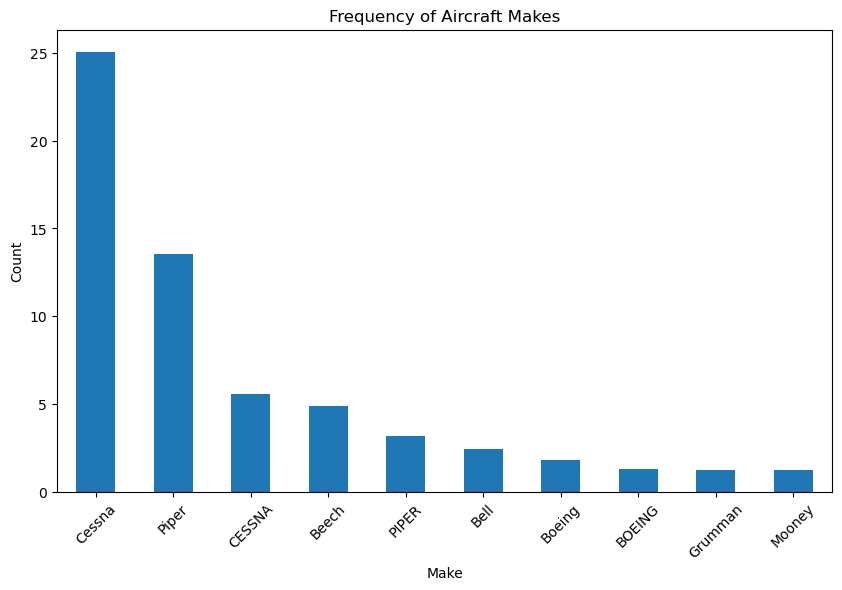

In [735]:
# Plotting a simple  bar graph using matplotlib
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar')
plt.title('Frequency of Aircraft Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Based on the chart, Cessna aircraft have the highest frequency, comprising 25% of all observed counts, which is notably the
highest. Following Cessna is , Piper with 13%, Beech, and Boeing are also prominent. Our interest now turns to determining 
which of these makes recorded the highest total injuries and which had the highest instances of being uninjured.

### Creating a new column of 'Total.Injuries

In [738]:
# Calculating total injuries (fatal, serious, minor) to assess severity
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df.loc[:, 'Total.Injuries']

0        2.0
1        4.0
2        3.0
3        2.0
4        3.0
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Total.Injuries, Length: 88889, dtype: float64

In [739]:
#adding the new column to the selected columns
relevant_columns = [
    'Weather.Condition', 'Event.Date', 'Country', 'Aircraft.damage', 
    'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Purpose.of.flight','Total.Injuries' 
]
aircraft_data = df[relevant_columns]
aircraft_data

,Weather.Condition,Event.Date,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Purpose.of.flight,Total.Injuries
0,UNK,10/24/1948,United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal,2.0
1,UNK,7/19/1962,United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Personal,4.0
2,IMC,8/30/1974,United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,1.0,Personal,3.0
3,IMC,6/19/1977,United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal,2.0
4,VMC,8/2/1979,United States,Destroyed,Cessna,501,No,1.0,United States,1.0,2.0,0.0,0.0,Personal,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,NaN,12/26/2022,United States,Substantial,PIPER,PA-28-151,No,1.0,United States,0.0,1.0,0.0,0.0,Personal,1.0
88885,NaN,12/26/2022,United States,Substantial,BELLANCA,7ECA,No,1.0,United States,0.0,0.0,0.0,0.0,United States,0.0
88886,VMC,12/26/2022,United States,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,United States,0.0,0.0,0.0,1.0,Personal,0.0
88887,NaN,12/26/2022,United States,Substantial,CESSNA,210N,No,1.0,United States,0.0,0.0,0.0,0.0,Personal,0.0


### 1b. Analyzing trends and patterns to identify which 'Make' has the highest number number of injuries.

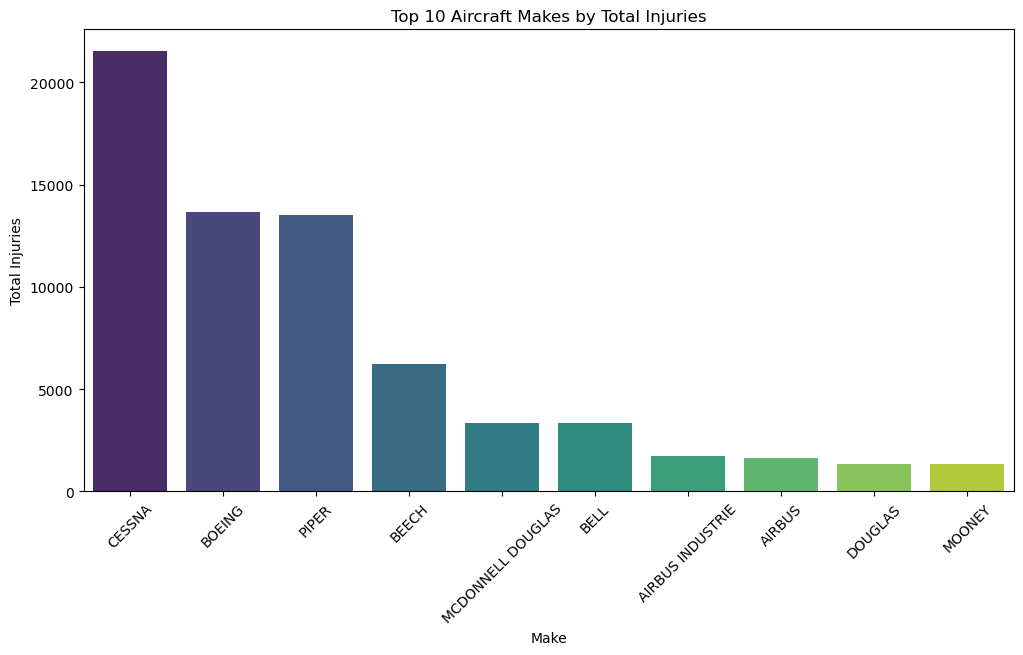

In [741]:
#want to plot Make against highest number of total injuries
aircraft_data.loc[:,'Make'] = aircraft_data['Make'].str.upper()

# Group by 'Make' and sum the 'Total.Injuries'
make_injuries = aircraft_data.groupby('Make')['Total.Injuries'].sum().reset_index()

# Sort by Total Injuries and select top 10 makes
top_10_makes = make_injuries.sort_values(by='Total.Injuries', ascending=False).head(10)

# Plotting the top 10 makes by total injuries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_makes, x='Make', y='Total.Injuries', palette='viridis')
plt.title('Top 10 Aircraft Makes by Total Injuries')
plt.xlabel('Make')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

Once more, according to the chart, aircraft makes such as Cessna, Boeing, Piper, and Beech. consistently show higher numbers
of injuries, followed closely by 'MACDONNEL DOUGLAS','BELL','AIRBUS'. Now, let's delve deeper to determine which make has
the highest count of uninjured cases, allowing for a comprehensive analysis to understand why these particular makes are 
associated with such significant case numbers.

### Plotting 'Make' against highest number of 'Total.Uninjured'

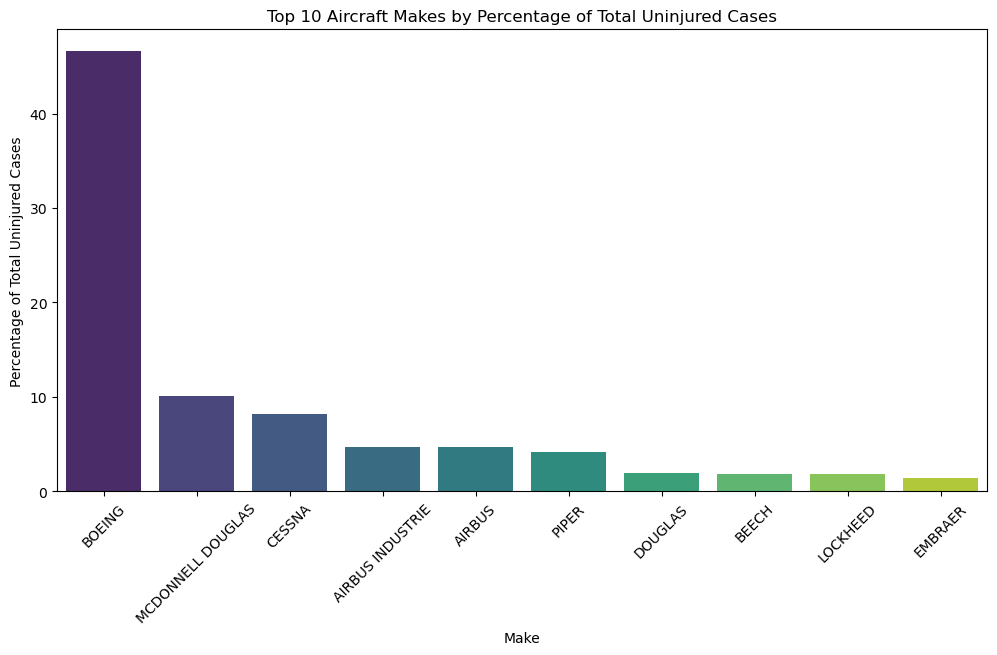

In [744]:
# Group by 'Make' and sum the 'Total.Uninjured'
make_uninjured = aircraft_data.groupby('Make')['Total.Uninjured'].sum().reset_index()

# Calculate the total uninjured cases across all makes
total_uninjured_cases = make_uninjured['Total.Uninjured'].sum()

# Calculate percentage of total uninjured cases for each make
make_uninjured['Percentage.Uninjured'] = (make_uninjured['Total.Uninjured'] / total_uninjured_cases) * 100

# Sort by Percentage.Uninjured and select top 10 makes
top_10_makes_uninjured = make_uninjured.sort_values(by='Percentage.Uninjured', ascending=False).head(10)

# Plotting the top 10 makes by percentage of total uninjured cases
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_makes_uninjured, x='Make', y='Percentage.Uninjured', palette='viridis')
plt.title('Top 10 Aircraft Makes by Percentage of Total Uninjured Cases')
plt.xlabel('Make')
plt.ylabel('Percentage of Total Uninjured Cases')
plt.xticks(rotation=45)
plt.show()


Previously, 'CESSNA', 'BOEING', 'PIPER', and 'BEECH' showed the highest total injuries. In the latest observation, 'BOEING',
'MCDONNEL DOUGLAS','CESSNA' and 'AIRBUS' have taken the lead in total uninjured cases.With 'BOEING' takin lead by over  This raises the question whether these
numbers represent passengers aboard these aircraft, suggesting a preference for these makes.

### Trends of injuries and uninjured overtime

In [747]:
# Set option to handle inf as NaN globally
#pd.set_option('mode.use_inf_as_na', True)

# Convert 'Event.Date' to datetime format
aircraft_data.loc[:, 'Date'] = pd.to_datetime(aircraft_data['Event.Date'])

print(aircraft_data['Event.Date'].dtype)

# Example: Convert 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Event.date'
aircraft_data.loc[:, 'Year'] = aircraft_data['Date'].dt.year

object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\2521471072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_data.loc[:, 'Date'] = pd.to_datetime(aircraft_data['Event.Date'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\2521471072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_data.loc[:, 'Year'] = aircraft_data['Date'].dt.year


Aggregated Data (Total Injuries and Total Uninjured) Over Years by Make:
     Year    Make  Total.Injuries  Total.Uninjured
0    1962   PIPER             4.0              0.0
1    1974  CESSNA             3.0              1.0
2    1979  CESSNA             3.0              0.0
3    1981  CESSNA             4.0              0.0
4    1982   BEECH           245.0            394.0
..    ...     ...             ...              ...
163  2021   PIPER           150.0            238.0
164  2022   BEECH            53.0             86.0
165  2022  BOEING           168.0           5986.0
166  2022  CESSNA           311.0            427.0
167  2022   PIPER           147.0            249.0

[168 rows x 4 columns]


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


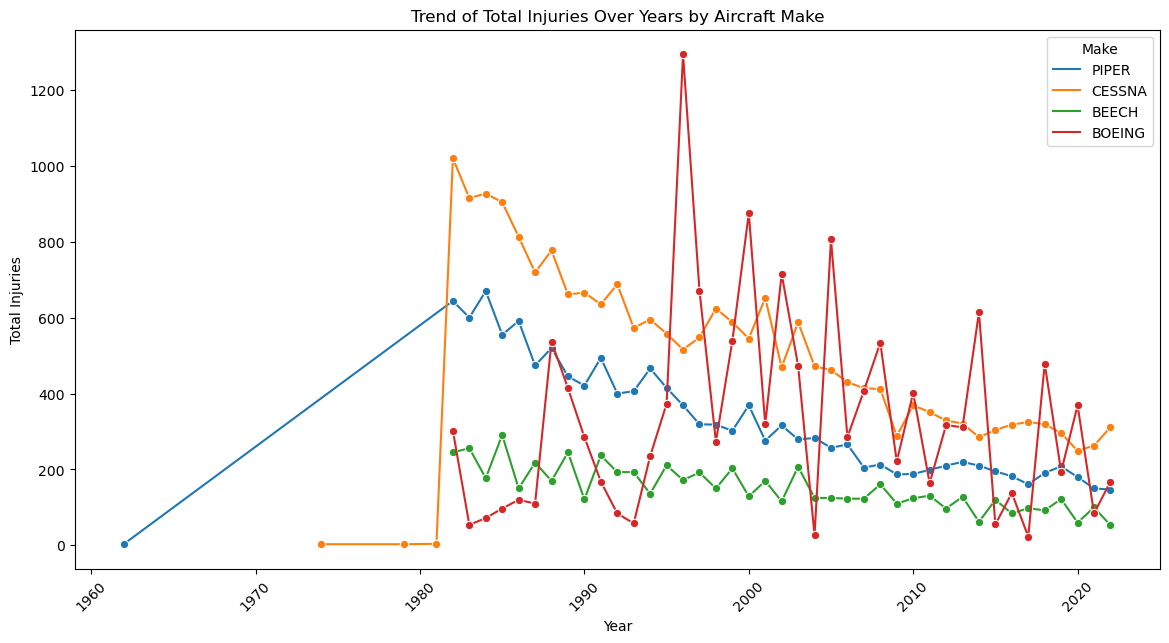

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


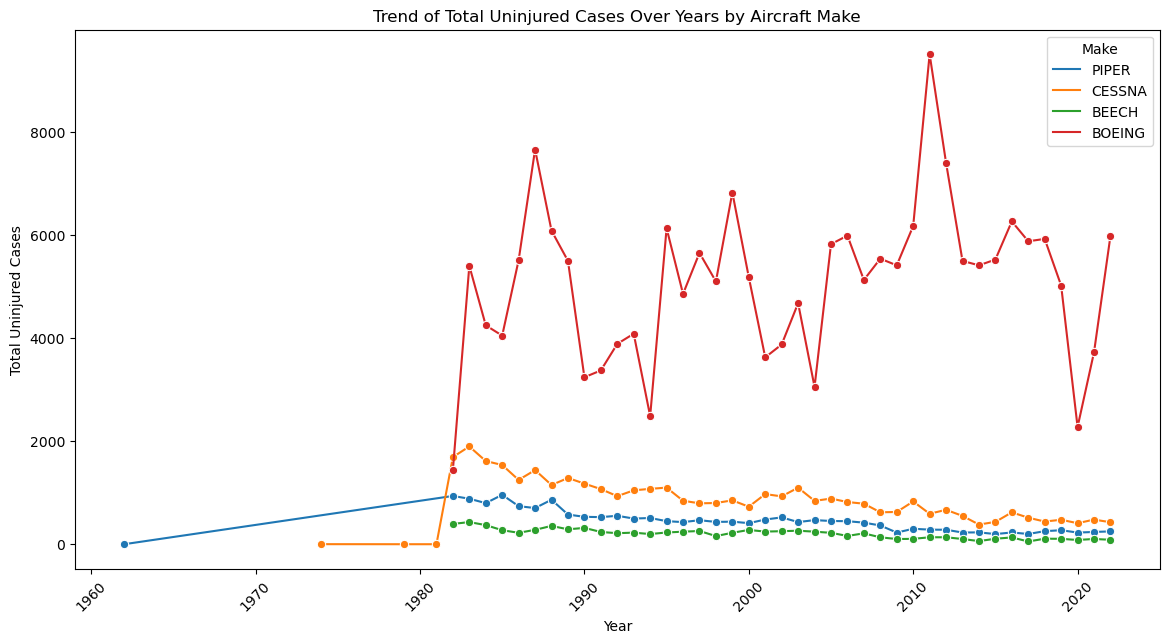

In [748]:
# Filter for common makes
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']
aircraft_data.loc[:,'Make'] = aircraft_data['Make'].str.upper()
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Group by 'Year' and 'Make' and sum the 'Total.Injuries' and 'Total.Uninjured'
trend_data = filtered_data.groupby(['Year', 'Make']).agg({
    'Total.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Display the aggregated data before plotting
print("Aggregated Data (Total Injuries and Total Uninjured) Over Years by Make:")
print(trend_data)

# Plotting the trend of total injuries over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data, x='Year', y='Total.Injuries', hue='Make', marker='o')
plt.title('Trend of Total Injuries Over Years by Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Make')
plt.show()

# Plotting the trend of total uninjured cases over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data, x='Year', y='Total.Uninjured', hue='Make', marker='o')
plt.title('Trend of Total Uninjured Cases Over Years by Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Uninjured Cases')
plt.xticks(rotation=45)
plt.legend(title='Make')
plt.show()

# Reset the option to its default after the operations
#pd.set_option('mode.use_inf_as_na', False)

### Recommendation:
Based on the data analysis, while all common  have shown reductions in both injury and uninjured cases over time, Boeing stands out with
significant improvement in safety. Cessna also shows positive trends and can be considered a good choice, particularly for smaller aircraft
operations. Continuous vigilance and adherence to safety protocols remain crucial in aviation operations to maintain and improve safety standards
further.

### Does the number of Engine  and  Engine type matter?

In [828]:
# List of common makes (replace with your actual common makes)
#common_makes = ['Boeing', 'Cessna', 'Piper']
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']

# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_weather_counts = filtered_data.groupby(['Make', 'Engine.Type']).size().reset_index(name='Count')
make_weather_counts

,Make,Engine.Type,Count
0,BEECH,Reciprocating,4393
1,BEECH,Turbo Fan,11
2,BEECH,Turbo Jet,4
3,BEECH,Turbo Prop,596
4,BEECH,Turbo Shaft,2
5,BEECH,United States,312
6,BEECH,Unknown,54
7,BOEING,Reciprocating,360
8,BOEING,Turbo Fan,996
9,BOEING,Turbo Jet,194


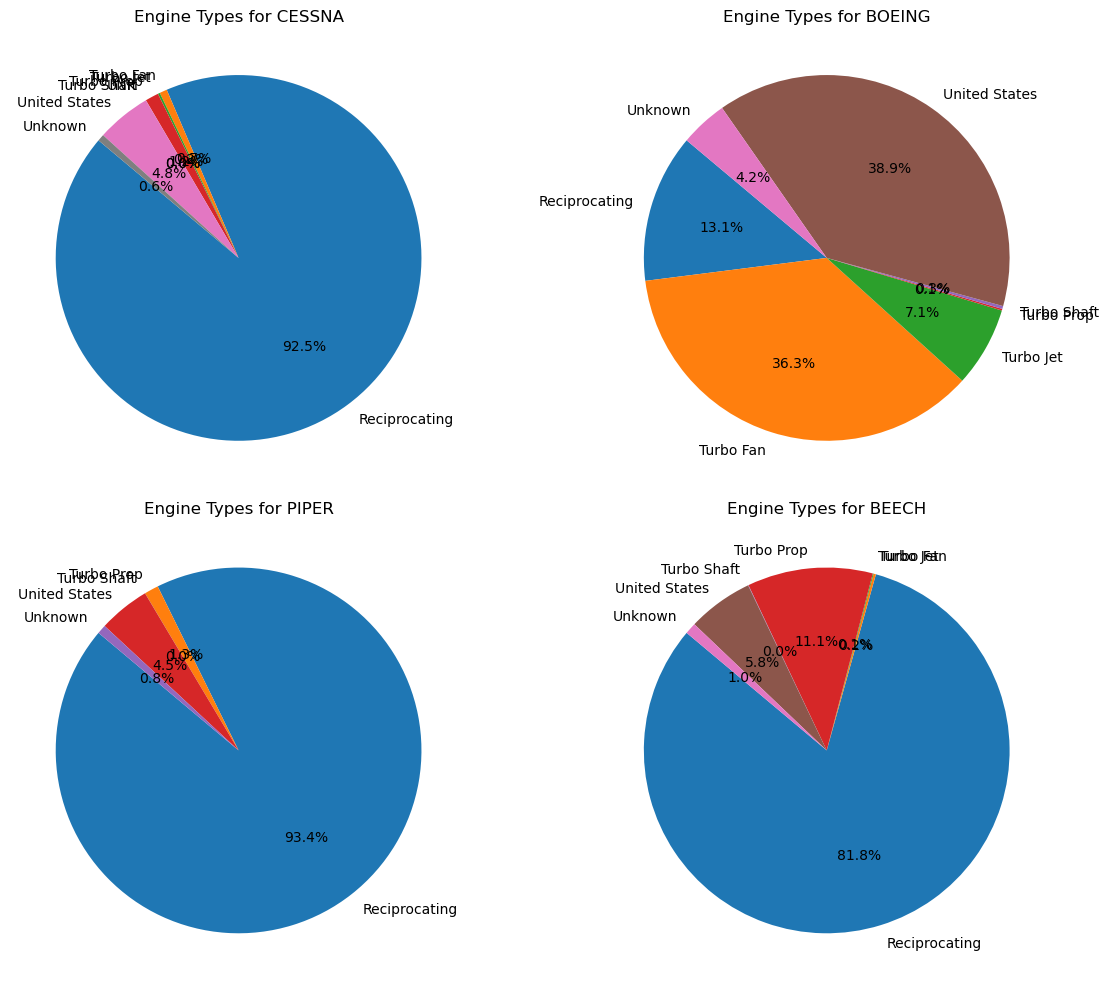

In [830]:

# Plotting a pie chart for each make
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each make
for i, make in enumerate(common_makes):
    # Filter data for the current make
    data = make_weather_counts[make_weather_counts['Make'] == make]
    
    # Plot pie chart
    axes[i].pie(data['Count'], labels=data['Engine.Type'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Engine Types for {make}')
    
# Adjust layout
plt.tight_layout()
plt.show()


Based on the pie charts, the majority of manufacturers (CESSNA, PIPER, BEECH) predominantly utilize reciprocating engines. Conversely, Boeing aircraft predominantly employ United States engines, with turbofan engines being the next most common choice.

### What was the weather condition

In [794]:
# List of common makes (replace with your actual common makes)
#common_makes = ['Boeing', 'Cessna', 'Piper']
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']

# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_weather_counts = filtered_data.groupby(['Make', 'Weather.Condition']).size().reset_index(name='Count')
make_weather_counts


,Make,Weather.Condition,Count
0,BEECH,IMC,765
1,BEECH,UNK,64
2,BEECH,Unk,12
3,BEECH,VMC,4353
4,BOEING,IMC,216
5,BOEING,UNK,94
6,BOEING,Unk,44
7,BOEING,VMC,1331
8,CESSNA,IMC,1901
9,CESSNA,UNK,249


### Purpose of the flight

In [815]:
#purpose of the flight group by 'Make'
common_makes = ['BOEING', 'PIPER', 'BEECH', 'CESSNA']

# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_purpose_counts = filtered_data.groupby(['Make', 'Purpose.of.flight']).size().reset_index(name='Count').head(50)
make_purpose_counts


,Make,Purpose.of.flight,Count
0,BEECH,Aerial Observation,6
1,BEECH,Business,481
2,BEECH,Executive/corporate,76
3,BEECH,Ferry,72
4,BEECH,Firefighting,1
5,BEECH,Flight Test,21
6,BEECH,Instructional,495
7,BEECH,Other Work Use,30
8,BEECH,Personal,3296
9,BEECH,Positioning,136


#### Interpretation:
BEECH:

Personal: 3296 flights
Instructional: 495 flights
Business: 481 flights
Executive/Corporate: 76 flights
Other notable purposes: Aerial Observation (6), Ferry (72), Skydiving (20)
Insight: Beechcraft aircraft are primarily used for personal flights, followed by instructional purposes and business.

BOEING:
United States: 1551 flights/n
Personal: 289 flights/n
Business: 15 flights
Other notable purposes: Aerial Application (20), Ferry (11), Flight Test (5)
Insight: Boeing aircraft are most commonly used for flights within the United States, with a significant number of personal flights as well.

CESSNA:
Personal: 15874 flights
Instructional: 5123 flights
Business: 1355 flights
Executive/Corporate: 154 flights
Other notable purposes: Aerial Application (659), Aerial Observation (254), Ferry (219), Glider Tow (6)
Insight: Cessna aircraft are overwhelmingly used for personal flights, with a substantial number used for instructional purposes and 
various other operational needs like business and aerial applications.

Summary:
Beechcraft and Boeing aircraft are commonly used for flights within the United States and for personal travel.
Cessna aircraft are highly versatile, primarily used for personal flights but also extensively for instructional purposes, business,
 and specialized operations like aerial applications and observation.

### Final Analysis: Grouping Make by Countries

In [823]:
# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_country_counts = filtered_data.groupby(['Make', 'Country']).size().reset_index(name='Count').head(100)
make_country_counts

,Make,Country,Count
0,BEECH,ATLANTIC OCEAN,5
1,BEECH,American Samoa,1
2,BEECH,Angola,2
3,BEECH,Antarctica,1
4,BEECH,Antigua And Barbuda,1
...,...,...,...
95,BOEING,Benin,1
96,BOEING,Bolivia,4
97,BOEING,Brazil,34
98,BOEING,Bulgaria,1


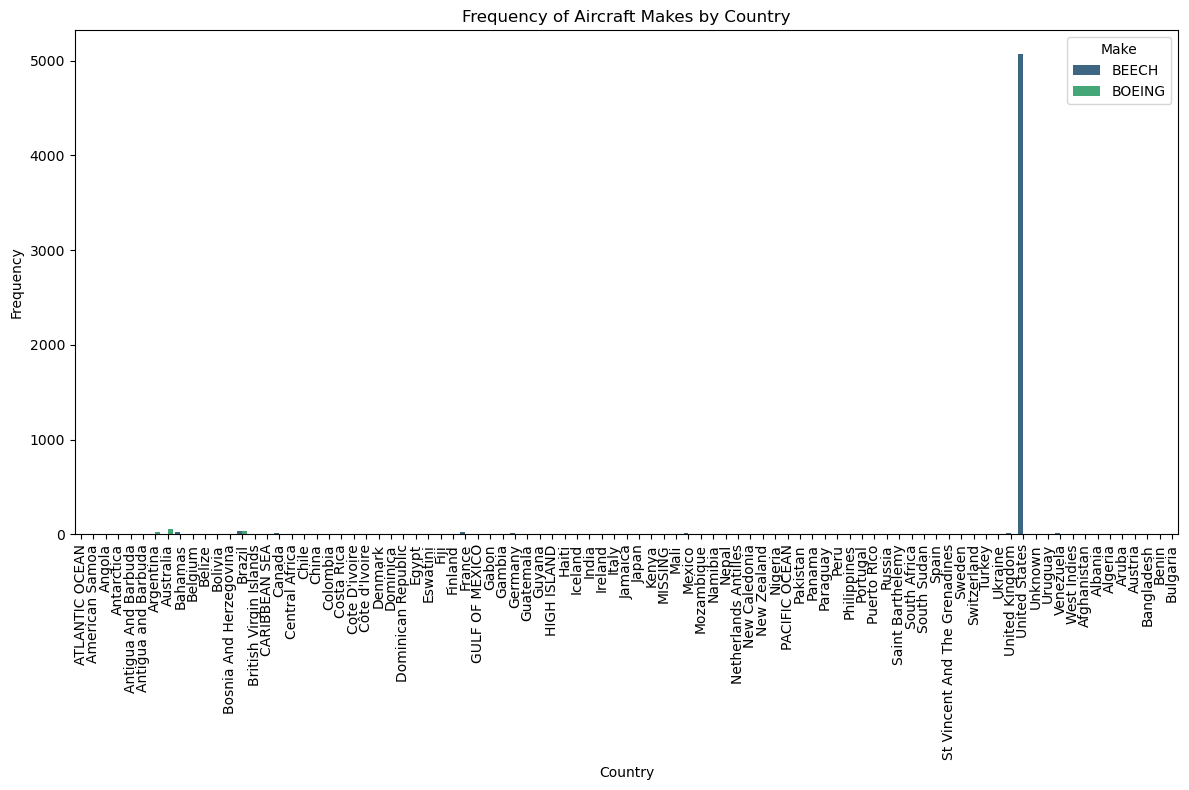

In [825]:

# Assuming make_country_counts contains your data
plt.figure(figsize=(12, 8))
sns.barplot(data=make_country_counts, x='Country', y='Count', hue='Make', palette='viridis')
plt.title('Frequency of Aircraft Makes by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Make', loc='upper right')
plt.tight_layout()
plt.show()

Based on the observations above, the majority of the data pertains to airplanes from the United States. Other countries have relatively fewer 
entries for their aircraft. Specifically, approximately 90% of the aircraft attributed to the 'Boeing' make originate from the United States.

## RECOMMENDATIONS AND  CONCLUSION.

Based on the analysis that shows a reduction in both injury cases and uninjured cases over time, here are some recommendations and observations 
based on the common aircraft makes:

#### Observations:
Reduction in Injury Cases and Uninjured Cases:

The data indicates a general trend of decreasing total injuries and uninjured cases across all common aircraft makes over the years.
##### Improvement by Make:

Boeing: Despite starting with higher numbers, Boeing has shown a significant improvement in reducing both injury and uninjured cases over time.
Cessna: Cessna has also shown consistent improvement in reducing injury and uninjured cases.
Piper and Beech: These makes have also shown improvements but generally had lower numbers compared to Boeing and Cessna.

#### Safety Recommendation:
Based on the analysis, Boeing appears to have made the most substantial improvement in safety over the years, showing a reduction in both injury 
    and uninjured cases. This suggests that Boeing aircraft may be considered relatively safer to use compared to other makes.
Cessna also shows improvement and can be considered a good choice, especially for smaller aircraft operations.
Considerations:

It's essential to continue monitoring safety trends and ensure that improvements are sustained over time.
Factors such as technological advancements, maintenance practices, and regulatory changes may contribute to these improvements.